## Import libraries

In [1]:
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Model
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

Using TensorFlow backend.


## Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print( "Number of train data: "+str(X_train.shape[0]) )
print( "Number of test data:  "+str(X_test.shape[0]) )
print( "\n\nShape of X_train: \t" + str(X_train.shape) )
print( "\nShape of y_train: \t" + str(y_train.shape) )
print( "\nShape of X_test: \t" + str(X_test.shape) )
print( "\nShape of X_test: \t" + str(y_test.shape) )

Number of train data: 60000
Number of test data:  10000


Shape of X_train: 	(60000, 28, 28)

Shape of y_train: 	(60000,)

Shape of X_test: 	(10000, 28, 28)

Shape of X_test: 	(10000,)


## Visualize data

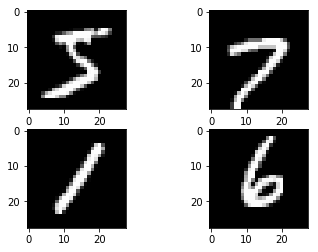

In [3]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[123], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[31245], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[51069], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Normalize Inputs

In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train.reshape(X_train.shape[0],28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28, 1).astype('float32')
X_train = (X_train-128.0) / 128.0
X_test = (X_test-128.0) / 128.0
print( "Input shape: " + str(X_train.shape) )

Input shape: (60000, 28, 28, 1)


## Convert labels to One hot

In [5]:
# one hot encode outputs
print( "Original shape of labels data:\t" + str(y_train.shape) )
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print( "Transformed shape of labels data:\t" + str(y_train.shape) )
print( "Number of classes: \t" + str(num_classes) )
print( "Label in one-hot: \t" , y_train[0] )

Original shape of labels data:	(60000,)
Transformed shape of labels data:	(60000, 10)
Number of classes: 	10
Label in one-hot: 	 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
def plotHistory(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               200832    
__________

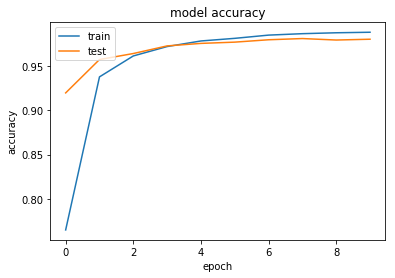

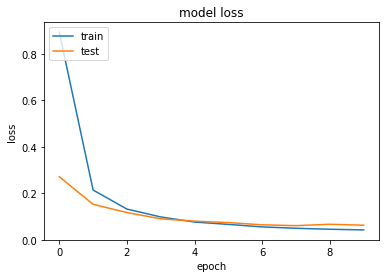

In [10]:
def getModel1():
    inputs = Input(shape=(28,28,1))
    x = Conv2D(32, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(32, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return model

model1 = getModel1()
model1.summary()

model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(X_train, y_train, validation_split=0.33, epochs=10, batch_size=1000, verbose=1)
# Final evaluation of the model
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plotHistory(history)

## Model with BatchNormalization

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 32)        128       
__________

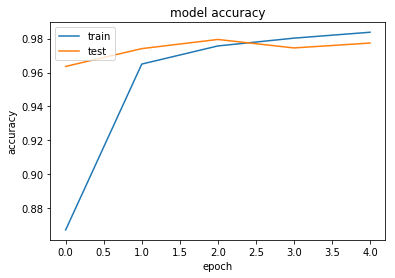

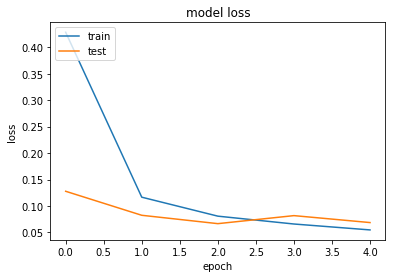

In [14]:
def getModel2():
    inputs = Input(shape=(28,28,1))

    x = Conv2D(32, kernel_size=(3, 3), strides=(1,1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = MaxPooling2D(pool_size=(2,2))(x)

    x = Conv2D(32, kernel_size=(3, 3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = MaxPooling2D(pool_size=(2,2))(x)
    
    x = Flatten()(x)
    x = Dropout(0.3)(x)
    
    x = Dense(512, activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.3)(x)
    
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return model

model2 = getModel2()
model2.summary()

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(X_train, y_train, validation_split=0.33, epochs=5, batch_size=1000, verbose=1)
# Final evaluation of the model
scores = model2.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
plotHistory(history)